## 1.1.2. Ridge Regression and Classification

Ridge regularization은 계수의 크기에 패널티를 부과하여 최소제곱법의 과적합 문제를 해결하는 정규화 방법입니다. 또한 L2 Regularization이라고도 부릅니다.<br><br>
Ridge regression은 최소제곱법(OLS)와 유사하나 '각 계수의 제곱을 합한 값'을 식에 포함하여 계수의 크기도 함께 최소화 하도록 만들었다는 차이가 있습니다.<br><br>
$ \min_{w}||X_w - y||_{2}^{2} + \alpha||w||_{2}^{2} $<br><br>
최소값을 구하는 것이 목적이므로 $\alpha$ 값이 커질 수록 $w$는 0으로 수렴할 것입니다.<br><br>
$w$값이 0으로 수렴한다면 아래의 그림과 같이 모델이 단순해지고 과적합을 방지할 수 있습니다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdOPLMG%2FbtqEPfYVzUO%2FZYkMYmq9fhJKQHXnJMrn90%2Fimg.png' />

### 1.1.2.1. Regression

In [1]:
from sklearn import linear_model
alpha = .2
reg = linear_model.Ridge(alpha = alpha)
reg.fit([[0,0], [0,0],[1,1]], [0, .1, 1])
print(f'alpha : {alpha}')
print(f'Coefficients : {reg.coef_}')
print(f'Intercept : {reg.intercept_}')

alpha : 0.2
Coefficients : [0.41304348 0.41304348]
Intercept : 0.09130434782608698


In [2]:
from sklearn import linear_model
alpha = .8
reg = linear_model.Ridge(alpha = alpha)
reg.fit([[0,0], [0,0],[1,1]], [0, .1, 1])
print(f'alpha : {alpha}')
print(f'Coefficients : {reg.coef_}')
print(f'Intercept : {reg.intercept_}')

alpha : 0.8
Coefficients : [0.296875 0.296875]
Intercept : 0.16875000000000007


**Plot Ridge coefficients as a function of the regularization**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1,11) + np.arange(0,10)[:, np.newaxis])
y = np.ones(10)

- Compute paths(계산 경로)

In [4]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

- Display result

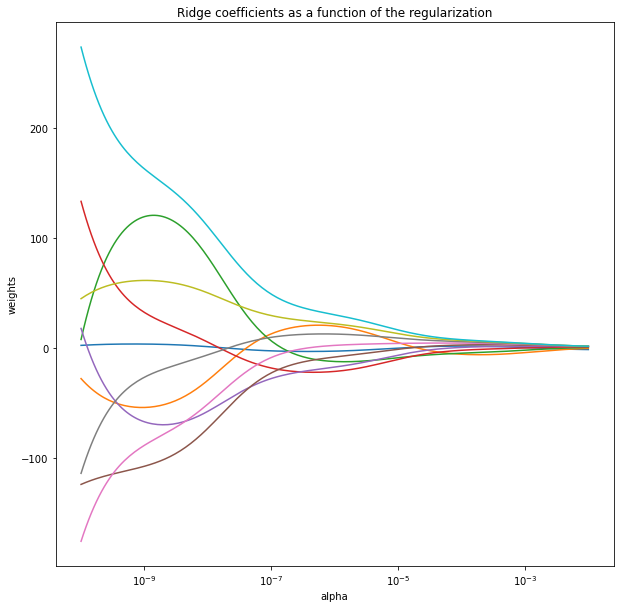

In [5]:
plt.rcParams["figure.figsize"] = (10, 10)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()